In [33]:
#Import Dependencies

import json
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
#Retrieve the json files from the appropriate API 
URL = "http://corona-api.com/countries/US"
USA_Json = requests.get(URL).json()


In [35]:
#This part is purely to determine the structure of the Json and how the data is organized
USA_timeline = USA_Json["data"]["timeline"]
USA_timeline

#We set up empty lists that we will append later while we are grabbing dates and confirmeed cases from the data
date = []
confirmed = []

In [36]:
#We noticed here that there are multiple entries for the same date, so in order to avoid this, everytime
#we loop through each data, we compare the date the loop is on and the next date in the loop. 
#If the dates do not match, then we know its a new recorded date and add the newly confirmed cases in our list
#the try and except here is because we are looking at the index+1, meaning at the end, we will get an index 
#error. If that happens, we stop the for loop and tells us we are done
try:

    for time in range(0, len(USA_timeline)):
        if time == 0:
            date.append(USA_timeline[time]["date"])
            confirmed.append(USA_timeline[time]["new_confirmed"])
        elif USA_timeline[time+1]["date"] != USA_timeline[time]["date"]:
            date.append(USA_timeline[time+1]["date"])
            confirmed.append(USA_timeline[time+1]["new_confirmed"])
            
except:
    
    print("done")

done


In [37]:
summary_stats = {
    "Date" : date,
    "Case Count" : confirmed
}

#Create a Data frame
USA_Cases = pd.DataFrame(summary_stats)

In [38]:
#change this to integers so that we can plot these points
USA_Cases['Case Count'] = USA_Cases['Case Count'].astype(int)

In [39]:
#we are only considering data points every 10 days so that the graph is more readable
USA_Cases = USA_Cases[USA_Cases.index % 10 == 0]

In [40]:
#The USA cases given are ordered from present to past, and we want them the other way around so that the graph makes more sense.
#This reverses the order. The dropped value is a value that has a data point that we do not belive is correct as its wildly different
#in other words, the data tells us that there was 700,000+ cases gained in that one day, which is wildly different from the previous
#days

USA_Cases = USA_Cases.iloc[::-1]
USA_Cases = USA_Cases.drop(0)

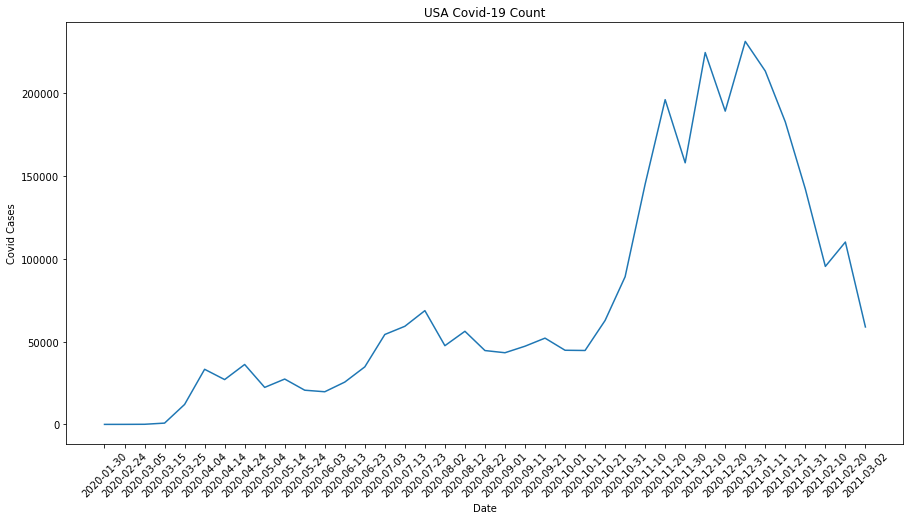

In [41]:
plt.figure(figsize=(15,7.75))
case_count = plt.plot(USA_Cases['Date'], USA_Cases['Case Count'])
plt.xticks(rotation=45);
plt.title("USA Covid-19 Count")
plt.ylabel("Covid Cases")
plt.xlabel("Date");
plt.show()
#plt.savefig("USA Covid-19 Count");

#we need to fix these tick marks as it is unreadable, and remove the huge spike,
#which we believe is an incorrectly reported data from the json file

In [28]:
confirmed.reverse()
date.reverse()
confirmed

confirmed


[1,
 0,
 1,
 0,
 3,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 3,
 1,
 0,
 1,
 2,
 20,
 0,
 18,
 0,
 6,
 1,
 2,
 8,
 6,
 25,
 21,
 31,
 68,
 57,
 139,
 120,
 68,
 354,
 322,
 382,
 516,
 547,
 773,
 1133,
 1789,
 1365,
 5894,
 5421,
 6392,
 7783,
 10391,
 10073,
 12038,
 18058,
 17821,
 19821,
 19408,
 20921,
 26365,
 25200,
 30081,
 32133,
 33264,
 28222,
 29595,
 29556,
 32829,
 32385,
 35098,
 29861,
 28913,
 25310,
 27051,
 28680,
 31451,
 31905,
 32491,
 26889,
 25240,
 27710,
 27639,
 29495,
 36163,
 32821,
 27629,
 22414,
 24385,
 27327,
 29515,
 34037,
 29078,
 25501,
 22335,
 23976,
 24252,
 28420,
 26906,
 25621,
 19710,
 18621,
 21693,
 20832,
 27368,
 25050,
 24996,
 18937,
 21551,
 20260,
 23285,
 25294,
 23790,
 21675,
 20634,
 19056,
 18611,
 18263,
 22577,
 24266,
 24146,
 20007,
 20848,
 20801,
 19699,
 21140,
 29972,
 23133,
 18115,
 17548,
 18061,
 20975,
 22883,
 25639,
 25540,
 19532,
 19968,
 23705,
 25559,
 27763,
 31759,
 32307,
 26171,
 31010,
 34722,
 34471,
 40806,
 45255,

In [29]:
#processes to clean the data and graph

#Go through the data frame and remove rows that exceed a certain difference from the previous data


for x in range(0, len(confirmed)):
    if x+1 >= len(confirmed):
        print("end of list")
    elif confirmed[x+1] - confirmed[x] >= 300000:
        date.remove(date[x+1])
        confirmed.remove(confirmed[x+1])

    

#Recreate the Data frame and dict
summary_stats = {
    "Date" : date,
    "Case Count" : confirmed
}

USA_Cases = pd.DataFrame(summary_stats)
USA_Cases = USA_Cases.drop(0)

end of list
end of list


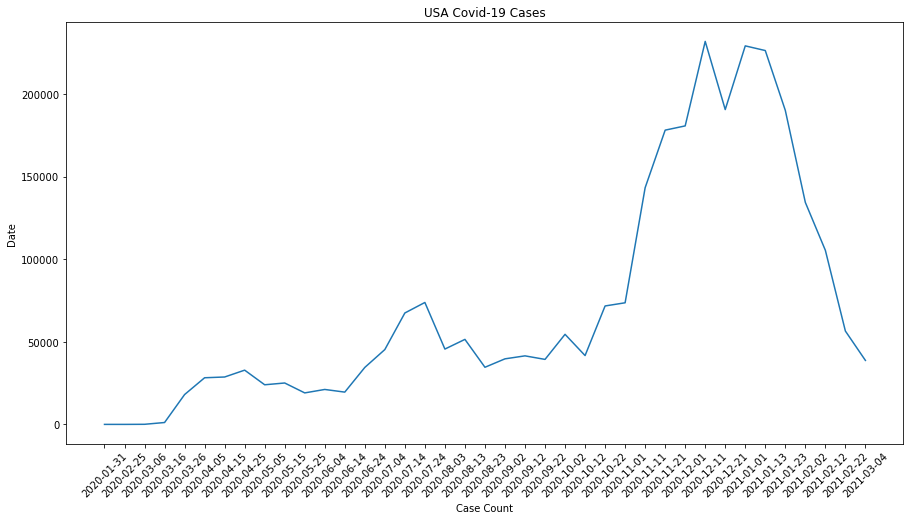

In [30]:

USA_Cases = USA_Cases[USA_Cases.index % 10 == 0]
# Create Figure and Axes instances
fig,ax = plt.subplots(1,figsize=(15,7.75))
# Make your plot, set your axes labels
ax.plot(USA_Cases['Date'], USA_Cases['Case Count'])
ax.set_ylabel('Case Count')
ax.set_xlabel('Date')
ax.set_title("USA Covid-19 Cases")
# Turn off tick labels




plt.xticks(rotation = 45)
plt.savefig("USA Covid-19 Count")
plt.show()

In [31]:
 URL2 = "https://api.covid19api.com/dayone/country/new-zealand"

In [32]:
NZ_Json = requests.get(URL2).json()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [15]:
#create lists of days and confirmed cases
NZ_date = []
NZ_confirmed = []

for x in range(0,len(NZ_Json)):
    NZ_date.append(NZ_Json[x]["Date"])
    NZ_confirmed.append(NZ_Json[x]["Confirmed"])

In [16]:
#splice and turn data into readable and workable types

NZ_summary_stats = {
    "Date" : NZ_date,
    "Case Count" : NZ_confirmed
}

NZ_Cases = pd.DataFrame(NZ_summary_stats)

#changes the Date format
NZ_Cases.Date = NZ_Cases.Date.str.slice(stop=10)

#changes the type in case count
NZ_Cases['Case Count'] = NZ_Cases['Case Count'].astype(int)

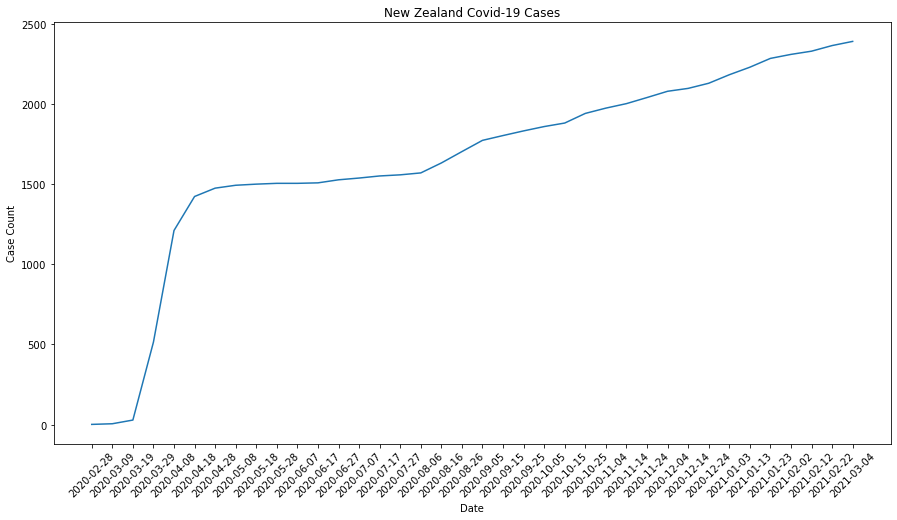

In [17]:
NZ_Cases = NZ_Cases[NZ_Cases.index % 10 == 0]
# Create Figure and Axes instances
fig,ax = plt.subplots(1,figsize=(15,7.75))
# Make your plot, set your axes labels
ax.plot(NZ_Cases['Date'], NZ_Cases['Case Count'])
ax.set_ylabel('Case Count')
ax.set_xlabel('Date')
ax.set_title("New Zealand Covid-19 Cases")
# Turn off tick labels

plt.xticks(rotation=45)
plt.savefig("NZ Covid-19 Count")
plt.show()